# Import Required Libraries
Import the necessary libraries, including pandas, json, and matplotlib.

In [1]:
# Import Required Libraries
import pandas as pd
import json
import matplotlib.pyplot as plt
from datetime import datetime
import seaborn as sns
import numpy as np

# Load and Parse the .md File
Load the .md file and parse the JSON content to extract time-tracking entries.

In [2]:
import json
import pandas as pd

# Define the path to the .md file
file_path = 'Time registration.md'

# Read the content of the .md file
with open(file_path, 'r') as file:
    content = file.read()

# Extract all JSON entries
entries = []
for block in content.split('```simple-time-tracker'):
    if '```' in block:
        json_content = block.split('```')[0].strip()
        if json_content:
            data = json.loads(json_content)
            entries.extend(data['entries'])

# Convert the JSON data to a DataFrame
df = pd.DataFrame(entries)

# Convert startTime and endTime to datetime objects
df['startTime'] = pd.to_datetime(df['startTime'])
df['endTime'] = pd.to_datetime(df['endTime'])

# Calculate the duration of each entry
df['duration'] = df['endTime'] - df['startTime']

# Display the DataFrame
df.head()

,name,startTime,endTime,duration
0,Travel,2024-11-11 09:45:00+00:00,2024-11-11 11:00:00+00:00,0 days 01:15:00
1,Meeting (practicalities),2024-11-11 11:00:00+00:00,2024-11-11 14:00:00+00:00,0 days 03:00:00
2,Literature study (AvSec/PointFWD),2024-11-11 14:00:00+00:00,2024-11-11 16:14:09+00:00,0 days 02:14:09
3,Set-up,2024-11-11 16:14:30+00:00,2024-11-11 16:45:00+00:00,0 days 00:30:30
4,Travel,2024-11-11 16:45:00+00:00,2024-11-11 18:15:00+00:00,0 days 01:30:00


# Process Time-Tracking Data
Convert start and end times to datetime objects and calculate the duration of each entry.

In [3]:
# Process Time-Tracking Data

# Convert startTime and endTime to datetime objects
df['startTime'] = pd.to_datetime(df['startTime'])
df['endTime'] = pd.to_datetime(df['endTime'])

# Calculate the duration of each entry
df['duration'] = df['endTime'] - df['startTime']

# Display the DataFrame
df.head()

,name,startTime,endTime,duration
0,Travel,2024-11-11 09:45:00+00:00,2024-11-11 11:00:00+00:00,0 days 01:15:00
1,Meeting (practicalities),2024-11-11 11:00:00+00:00,2024-11-11 14:00:00+00:00,0 days 03:00:00
2,Literature study (AvSec/PointFWD),2024-11-11 14:00:00+00:00,2024-11-11 16:14:09+00:00,0 days 02:14:09
3,Set-up,2024-11-11 16:14:30+00:00,2024-11-11 16:45:00+00:00,0 days 00:30:30
4,Travel,2024-11-11 16:45:00+00:00,2024-11-11 18:15:00+00:00,0 days 01:30:00


# Group Entries by Segments
Group the time-tracking entries by segments such as 'Literature study' and other relevant categories.

In [4]:
# Group Entries by Segments

# Define the segments and their corresponding keywords
segments = {
    'Literature study': ['Literature study'],
    'YOLO': ['YOLO'],
    'Create planning': ['Create planning'],
    'Research questions': ['Research questions'],
    'Presentation preparation': ['Presentation preparation'],
    'Play with YOLO': ['Play with YOLO'],
    'Clean-up notes': ['Clean-up notes'],
    'Travel': ['Travel'],
    'Set-up' : ['Set-up'],
    'Meeting': ['Meeting'],
    'Clean-up': ['Clean-up'],
    'Data collection': ['Data collection'],
}

# Function to categorize each entry based on the segments
def categorize_entry(name):
    for segment, keywords in segments.items():
        if any(keyword in name for keyword in keywords):
            return segment
    return 'Other'

# Apply the categorization function to the DataFrame
df['segment'] = df['name'].apply(categorize_entry)

# Group by segments and calculate the total duration for each segment
grouped_df = df.groupby('segment')['duration'].sum().reset_index()

# Display the grouped DataFrame
grouped_df.head()

,segment,duration
0,Clean-up notes,0 days 02:03:49.039000
1,Create planning,0 days 01:47:25.470000
2,Data collection,0 days 01:43:14.082000
3,Literature study,0 days 20:52:45.401000
4,Meeting,0 days 07:58:59.904000


# Calculate Time Spent per Segment
Calculate the total time spent on each segment for each week.

In [5]:
# Calculate Time Spent per Segment

# Add a 'week' column to the DataFrame to represent the week number of each entry
df['week'] = df['startTime'].dt.isocalendar().week

# Group by 'week' and 'segment' and calculate the total duration for each segment per week
weekly_segment_duration = df.groupby(['week', 'segment'])['duration'].sum().reset_index()

# Convert the duration from timedelta to hours for better readability
weekly_segment_duration['duration_hours'] = weekly_segment_duration['duration'].dt.total_seconds() / 3600

# Display the DataFrame with weekly segment duration
weekly_segment_duration.head()

,week,segment,duration,duration_hours
0,46,Clean-up notes,0 days 01:14:56.367000,1.248991
1,46,Data collection,0 days 01:43:14.082000,1.720578
2,46,Literature study,0 days 15:46:40.234000,15.777843
3,46,Meeting,0 days 04:28:56.904000,4.482473
4,46,Other,0 days 00:57:35.883000,0.959967


# Visualize Weekly Time Spent
Create visualizations (e.g., bar charts) to show the time spent on each segment per week.

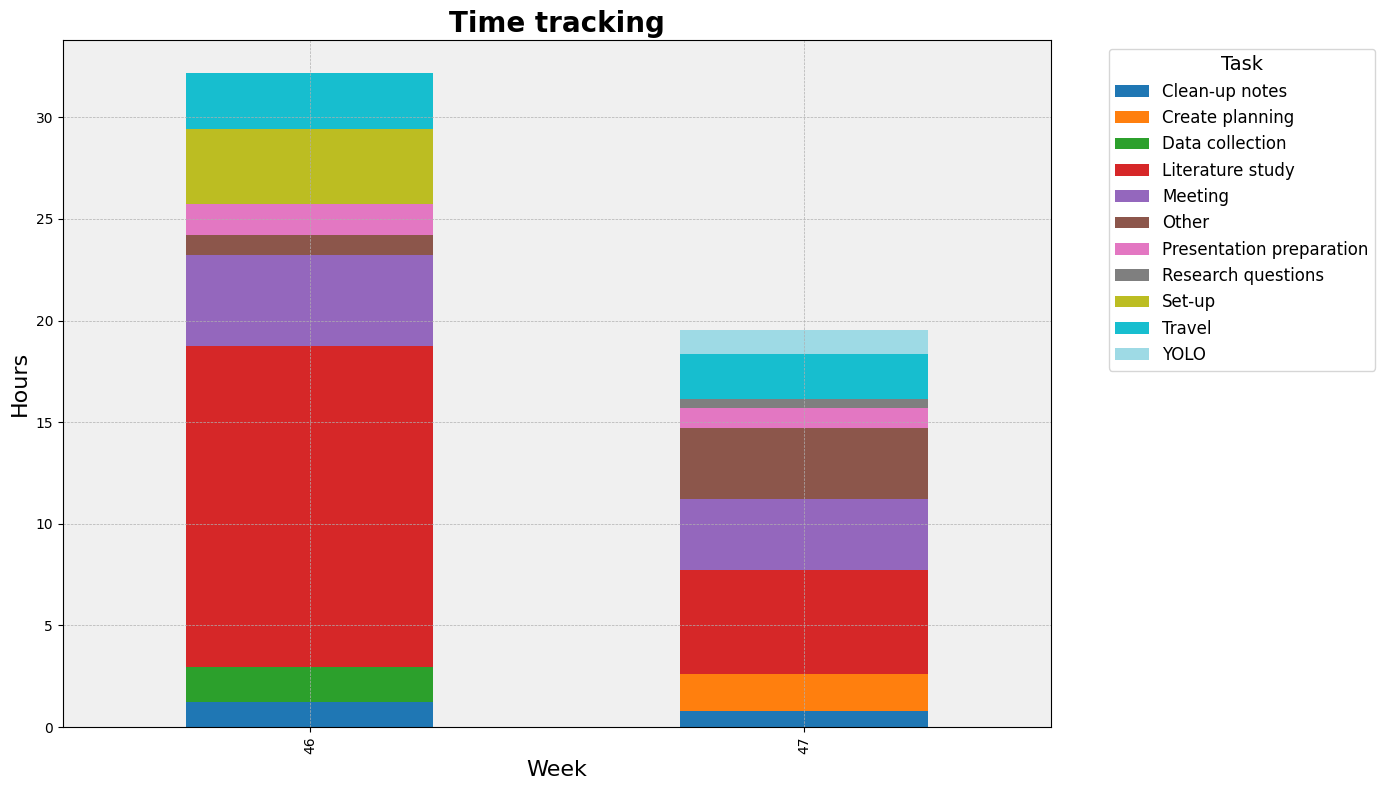

In [6]:
# Assuming weekly_segment_duration is already defined
pivot_df = weekly_segment_duration.pivot(index='week', columns='segment', values='duration_hours').fillna(0)

# Generate a colormap
colormap = plt.get_cmap('tab20')  # 'tab20' is a colormap with 20 distinguishable colors
colors = [colormap(i) for i in np.linspace(0, 1, pivot_df.shape[1])]

# Plot the data
fig, ax = plt.subplots(figsize=(14, 8))
pivot_df.plot(kind='bar', stacked=True, ax=ax, color=colors)

# Add title and labels
plt.title('Time tracking', fontsize=20, fontweight='bold', fontname='DejaVu Sans')
plt.xlabel('Week', fontsize=16, fontname='DejaVu Sans')
plt.ylabel('Hours', fontsize=16, fontname='DejaVu Sans')

# Customize legend
plt.legend(title='Task', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=12, title_fontsize=14)

# Add grid lines
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

# Set background color
ax.set_facecolor('#f0f0f0')

# Display the plot
plt.tight_layout()
plt.show()